<a href="https://colab.research.google.com/github/aravind-chilakamarri/CS5001-Fundamentals-of-Data-Engineering/blob/main/Project_5_DB_SQL_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA Bootcamp - Intro to SQL

## 1. Preparation

We start by setting up a connection to our sample database, Northwind DB.

In [ ]:
# download Northwind SQLite DB
!wget https://tdmdal.github.io/mma-sql/data/northwind.sqlite3

--2023-09-28 18:14:42--  https://tdmdal.github.io/mma-sql/data/northwind.sqlite3
Resolving tdmdal.github.io (tdmdal.github.io)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to tdmdal.github.io (tdmdal.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 804864 (786K) [application/octet-stream]
Saving to: ‘northwind.sqlite3’

northwind.sqlite3   100%[===================>] 786.00K  4.20MB/s    in 0.2s    

2023-09-28 18:14:43 (4.20 MB/s) - ‘northwind.sqlite3’ saved [804864/804864]



In [ ]:
# load the SQL magic extension
# https://github.com/catherinedevlin/ipython-sql
# this extension allows us to connect to DBs and issue SQL command
%load_ext sql

# now we can use the magic extension to connect to our SQLite DB
# use %sql to write an inline SQL command
# use %%sql to write SQL commands in a cell
%sql sqlite:///northwind.sqlite3

After connecting to the Northwind DB, let's first check what database engine we are using.

In [ ]:
%%sql
SELECT sqlite_version();

 * sqlite:///northwind.sqlite3
Done.


sqlite_version()
3.37.2


We are using [SQLite 3](https://www.sqlite.org/index.html). It's a small and fast Relational Database engine. SQLite DB is self-contained: one database is just a file. Believe it or not, SQLite is the most used DB engine in the world. It's built into millions of mobile phones (e.g. Android or iOS phones) and it's used by many popular apps to store data.  

## 2. A quick look at Northwind DB

### How many tables does this DB have?

A database may contain many tables. Let's see how many tables we have in the Northwind DB.

Every SQLite database has a special table called `sqlite_master`. It contains a master listing of all database objects (tables, indexes, etc.) in the database and the SQL used to create each object. We can query this table to find out how many tables (excluding `sqlite_master`) we have in our Northwind DB.

We will use SQL keywords `SELECT...FROM...WHERE`. Don't worry about them for now. We will soon learn those keywords.

In [ ]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:///northwind.sqlite3
Done.


name
Suppliers
Shippers
Employees
Customers
Orders
Categories
Products
OrderDetails


Note that special tables in SQLite start with `sqlite_`. Those are reserved tables for SQLite engine system use. Above we filtered out those tables. In most cases, we shouldn't touch those special tables.

### How does the Categories table look like?

A table is made up of one or more columns/fields. Let's take a look a the Categories table (column names, types, etc.).

In [ ]:
%sql PRAGMA table_info([Categories]);

 * sqlite:///northwind.sqlite3
Done.


cid,name,type,notnull,dflt_value,pk
0,CategoryID,INTEGER,1,None,1
1,CategoryName,nvarchar(15),1,None,0
2,Description,ntext,0,None,0
3,Picture,image,0,None,0


### How about the relationships between the tables?

We present the relationships between the tables using an Entity Relationship (ER) diagram.

<img src="https://tdmdal.github.io/mma-sql/images/NW_ER.png" alt="ER Diagram" width="836" height="605" />

In the above ER diagram, the tiny vertical key icon indicates a column is a primary key. A primary key is a column (or set of columns) whose values uniquely identify every row in a table. For example, `OrderID` is the primary key in the `Orders` table, and `OrderID` and `ProductID` (combined) is the primary key in the `OrderDetails` table.

The relationship icon (a line with a horizontal key at one end and an infinite symbol at the other end) indicates a foreign key constraint and a one-to-many relationship. A foreign key is a column (or set of columns) in one table whose values uniquely identify a row of another table or the same table. A foreign key mostly refers to a primary key in another table. A foreign key constraint requires that the constrained column contain only values from the primary key column of the other table. For example `CustomerID` in the `Orders` table is a foreign key that refers to the `CustomerID` primary key in the `Customers` table, and it can only contain values that exist in the `CustomerID` column of the `Customers` table.

In addition, it happens that every foreign key constraint in the Northwind DB establishes a one-to-many relationship, i.e. a row from one table can have multiple matching rows in another table. For example, one row from the `Customers` table can match multiple rows in the `Orders` table (via `CustomerID`). This makes sense as one customer can place more than one orders. (Another common relationship a foreign key constraint can establish is the one-to-one relationship.)

|logo|meaning|
|:------:|:------:|
|![key logo](https://tdmdal.github.io/mma-sql/images/key_vertical.png "key logo")|primary key|
|![foreign key constraint](https://tdmdal.github.io/mma-sql/images/relationship.png "foreign key constraint")|one-to-many foreign key contraint|

**Question**: Why do we need foreign key constraints? (Discussion)

You can find out relationships between tables by querying the `sqlite_master` table. See the code below.

Of course, querying the `sqlite_master` table to find out relationships between tables is specific to SQLite. We would do it differently if we use other database management systems. For example, if we use MySQL system, we would query the `key_column_usage` table in the `information_schema` DB. See this stackoverflow [question](https://stackoverflow.com/questions/20855065/how-to-find-all-the-relations-between-all-mysql-tables).

Alternatively, some SQL client tools can generate ER diagram for you. The above diagram is generated by SQL Server Management Studio (SSMS). The Northwind DB is a sample DB originally shipped with Microsoft SQL Server.

In [ ]:
%%sql
-- find out relationships between tables using SQL command
SELECT sql
FROM sqlite_master
WHERE name = "Orders"

 * sqlite:///northwind.sqlite3
Done.


sql
"CREATE TABLE [Orders] ( [OrderID] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CustomerID] nchar(5) NOT NULL COLLATE NOCASE, [EmployeeID] int NULL, [OrderDate] datetime NULL, [RequiredDate] datetime NULL, [ShippedDate] datetime NULL, [ShipVia] int NULL, [Freight] money DEFAULT 0 NULL, [ShipName] nvarchar(40) NULL COLLATE NOCASE, [ShipAddress] nvarchar(60) NULL COLLATE NOCASE, [ShipCity] nvarchar(15) NULL COLLATE NOCASE, [ShipRegion] nvarchar(15) NULL COLLATE NOCASE, [ShipPostalCode] nvarchar(10) NULL COLLATE NOCASE, [ShipCountry] nvarchar(15) NULL COLLATE NOCASE, CONSTRAINT [FK_Orders_Customers] FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Employees] FOREIGN KEY ([EmployeeID]) REFERENCES [Employees] ([EmployeeID]) ON DELETE NO ACTION ON UPDATE NO ACTION, CONSTRAINT [FK_Orders_Shippers] FOREIGN KEY ([ShipVia]) REFERENCES [Shippers] ([ShipperID]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


## Exercises

**We will work on the problems with a * sign together.** Other problems are left for homework.

## Part 1. Warm-up

We review

1. Retrieve data: `SELECT...FROM...`
2. Sort retrieved data: `SELECT...FROM...ORDER BY...`
3. Filter data: `SELECT...FROM...WHERE...`; `IN`, `NOT`, `LIKE` and `%` wildcard
4. Create calculated fields: mathematical calculations (e.g. +, -, *, /); data manipulation functions (e.g. `DATE()`, `||`)

### Ex1*. Which categories do we have?

Display `CategoryName` and `Description` in the `Categories` table.

In [ ]:
%%sql
-- start your code here
select CategoryName, Description from Categories

 * sqlite:///northwind.sqlite3
Done.


CategoryName,Description
Beverages,"Soft drinks, coffees, teas, beers, and ales"
Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings"
Confections,"Desserts, candies, and sweet breads"
Dairy Products,Cheeses
Grains/Cereals,"Breads, crackers, pasta, and cereal"
Meat/Poultry,Prepared meats
Produce,Dried fruit and bean curd
Seafood,Seaweed and fish


In [ ]:
# Just curious, what's in the picture column?
result = %sql SELECT CategoryName, Picture FROM Categories;
result.DataFrame().loc[0, 'Picture']

 * sqlite:///northwind.sqlite3
Done.


b"\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\x14\x00!\x00\xff\xff\xff\xffBitmap Image\x00Paint.Picture\x00\x01\x05\x00\x00\x02\x00\x00\x00\x07\x00\x00\x00PBrush\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0)\x00\x00BM\x98)\x00\x00\x00\x00\x00\x00V\x00\x00\x00(\x00\x00\x00\xac\x00\x00\x00x\x00\x00\x00\x01\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x88\x0b\x00\x00\x88\x0b\x00\x00\x08\x00\x00\x00\x08\x00\x00\x00\xff\xff\xff\x00\x00\xff\xff\x00\xff\x00\xff\x00\x00\x00\xff\x00\xff\xff\x00\x00\x00\xff\x00\x00\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x10\x00\x00\x00\x01\x00\x10\x00\x00\x00\x00\x00\x00\x01\x01\x01\x00\x01\x00\x00\x10\x01\x00\x00\x00\x01\x01\x00\x01\x00\x00\x00\x10\x01\x00\x00\x01\x00\x00\x00\x10\x10\x10\x00\x10\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x01\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x10\x01\x00\x00\x12Ppp\x10\x00\x00\x00\

<PIL.BmpImagePlugin.BmpImageFile image mode=P size=172x120 at 0x7AA56B485F00>


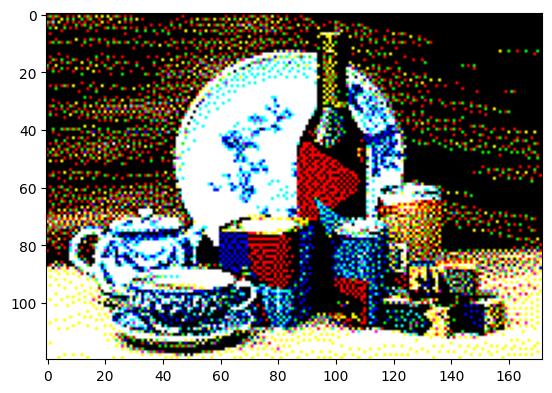

In [ ]:
# still curious about the picture column?
# image is actually stored as a blob (Binary Large Object) in SQLite
from matplotlib.pyplot import imshow
from PIL import Image
from io import BytesIO
%matplotlib inline
row = 0
im = Image.open(BytesIO(result.DataFrame().loc[row, 'Picture'][78:])) # cut the first 78 bytes (OLE header)
print(im)
imshow(im)

### Ex2. Which shippers do we have?

In [ ]:
%%sql
-- start your code here
select * from shippers

 * sqlite:///northwind.sqlite3
Done.


ShipperID,CompanyName,Phone
1,Speedy Express,(503) 555-9831
2,United Package,(503) 555-3199
3,Federal Shipping,(503) 555-9931


### Ex3* Find names and hire dates of all US sales representatives

The resulting table should display `FirstName`, `LastName`, `HireDate`, `Title` and `Country`.

In [ ]:
%%sql
-- take a look at the Employees table first
-- use LIMIT to limit the rows being displayed
SELECT FirstName, LastName, HireDate, Title, Country
FROM Employees
LIMIT 10

 * sqlite:///northwind.sqlite3
Done.


FirstName,LastName,HireDate,Title,Country
Nancy,Davolio,2010-05-01 00:00:00.000,Sales Representative,USA
Andrew,Fuller,2010-08-14 00:00:00.000,"Vice President, Sales",USA
Janet,Leverling,2010-04-01 00:00:00.000,Sales Representative,USA
Margaret,Peacock,2011-05-03 00:00:00.000,Sales Representative,USA
Steven,Buchanan,2011-10-17 00:00:00.000,Sales Manager,UK
Michael,Suyama,2011-10-17 00:00:00.000,Sales Representative,UK
Robert,King,2012-01-02 00:00:00.000,Sales Representative,UK
Laura,Callahan,2012-03-05 00:00:00.000,Inside Sales Coordinator,USA
Anne,Dodsworth,2012-11-15 00:00:00.000,Sales Representative,UK


In [ ]:
%%sql
-- just curious, how many distinct coutries do we have?
SELECT DISTINCT Country
FROM Employees

 * sqlite:///northwind.sqlite3
Done.


Country
USA
UK


In [ ]:
%%sql
-- start your code here
SELECT FirstName, LastName, HireDate, Title, Country
FROM Employees where Country = 'USA' and Title = 'Sales Representative'

 * sqlite:///northwind.sqlite3
Done.


FirstName,LastName,HireDate,Title,Country
Nancy,Davolio,2010-05-01 00:00:00.000,Sales Representative,USA
Janet,Leverling,2010-04-01 00:00:00.000,Sales Representative,USA
Margaret,Peacock,2011-05-03 00:00:00.000,Sales Representative,USA


### Ex4. Find supplier contacts who are *not* marketing managers

Display `supplierID`, `ContactNames` and `ContactTitle` for those whose `ContactTitle` is *not* Marketing Manager.

Hint: `NOT` operator.

In [ ]:
%%sql
-- start your code here
select SupplierID, ContactName, ContactTitle from suppliers where ContactTitle != 'Marketing Manager'

 * sqlite:///northwind.sqlite3
Done.


SupplierID,ContactName,ContactTitle
1,Charlotte Cooper,Purchasing Manager
2,Shelley Burke,Order Administrator
3,Regina Murphy,Sales Representative
5,Antonio del Valle Saavedra,Export Administrator
6,Mayumi Ohno,Marketing Representative
8,Peter Wilson,Sales Representative
9,Lars Peterson,Sales Agent
11,Petra Winkler,Sales Manager
12,Martin Bein,International Marketing Mgr.
13,Sven Petersen,Coordinator Foreign Markets


### Ex.5* Find products with "Chef" in its name

Hint: `LIKE` operator and `%` wildcard.

In [ ]:
%%sql
-- start your code here
select * from Products where ProductName like "Chef%"

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


### Ex.6 Find all orders shipping to Canada, Mexico or USA.

Hint: `IN` operator.

In [ ]:
%%sql
-- start your code here
select * from orders where ShipCountry in ("Canada","Mexico","USA")

 * sqlite:///northwind.sqlite3
Done.


OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
10259,CENTC,4,2014-07-18 16:00:00.000,2014-08-15 00:00:00.000,2014-07-25 00:00:00.000,3,3.25,Centro comercial Moctezuma,Sierras de Granada 9993,México D.F.,None,05022,Mexico
10262,RATTC,8,2014-07-22 19:00:00.000,2014-08-19 00:00:00.000,2014-07-25 00:00:00.000,3,48.29,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA
10269,WHITC,5,2014-07-31 00:00:00.000,2014-08-14 00:00:00.000,2014-08-09 00:00:00.000,1,4.56,White Clover Markets,1029 - 12th Ave. S.,Seattle,WA,98124,USA
10271,SPLIR,6,2014-08-01 05:00:00.000,2014-08-29 00:00:00.000,2014-08-30 00:00:00.000,2,4.54,Split Rail Beer & Ale,P.O. Box 555,Lander,WY,82520,USA
10272,RATTC,6,2014-08-02 03:00:00.000,2014-08-30 00:00:00.000,2014-08-06 00:00:00.000,2,98.03,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA
10276,TORTU,8,2014-08-08 18:00:00.000,2014-08-22 00:00:00.000,2014-08-14 00:00:00.000,3,13.84,Tortuga Restaurante,Avda. Azteca 123,México D.F.,None,05033,Mexico
10293,TORTU,1,2014-08-29 15:00:00.000,2014-09-26 00:00:00.000,2014-09-11 00:00:00.000,3,21.18,Tortuga Restaurante,Avda. Azteca 123,México D.F.,None,05033,Mexico
10294,RATTC,4,2014-08-30 05:00:00.000,2014-09-27 00:00:00.000,2014-09-05 00:00:00.000,2,147.26,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA
10304,TORTU,1,2014-09-12 06:00:00.000,2014-10-10 00:00:00.000,2014-09-17 00:00:00.000,2,63.79,Tortuga Restaurante,Avda. Azteca 123,México D.F.,None,05033,Mexico
10305,OLDWO,8,2014-09-13 20:00:00.000,2014-10-11 00:00:00.000,2014-10-09 00:00:00.000,3,257.62,Old World Delicatessen,2743 Bering St.,Anchorage,AK,99508,USA


### Ex.7* Who is the oldest employee?

Display `FirstName`, `LastName`, `Title`, and birth date, ordered by birth date. Show only the date portion of the `BirthDate` column/field (YYYY-MM-DD).

In [ ]:
%%sql
-- start your code here
select FirstName, LastName, Title, strftime('%Y/%m/%d', BirthDate) AS birthdate from Employees Order by birthdate

 * sqlite:///northwind.sqlite3
Done.


FirstName,LastName,Title,birthdate
Margaret,Peacock,Sales Representative,1955/09/19
Nancy,Davolio,Sales Representative,1966/12/08
Andrew,Fuller,"Vice President, Sales",1970/02/19
Steven,Buchanan,Sales Manager,1973/03/04
Laura,Callahan,Inside Sales Coordinator,1976/01/09
Robert,King,Sales Representative,1978/05/29
Michael,Suyama,Sales Representative,1981/07/02
Janet,Leverling,Sales Representative,1981/08/30
Anne,Dodsworth,Sales Representative,1984/01/27


### EX.8 Show employee full name

Show the `FirstName` and `LastName` columns from the `Employees` table, and then create a new column called `FullName`, showing first name and last name joined together in one column in a format like "DAVOLIO, Nancy".

In [ ]:
%%sql
-- start your code here
select upper(LastName) || ', ' || FirstName as FullName from employees;

 * sqlite:///northwind.sqlite3
Done.


FullName
"DAVOLIO, Nancy"
"FULLER, Andrew"
"LEVERLING, Janet"
"PEACOCK, Margaret"
"BUCHANAN, Steven"
"SUYAMA, Michael"
"KING, Robert"
"CALLAHAN, Laura"
"DODSWORTH, Anne"


### Ex.9* Which order items have total sales above $12,000.

In the `OrderDetails` table, we have the columns `UnitPrice` and `Quantity`. Create a new column, `TotalPrice`, that multiplies these two (ignore the `Discount` column). Display `OrderID`, `ProductID`, `UnitPrice`, `Quantity` and `TotalPrice`. Order the result first by `ProductID` (ascending) and then by `TotalPrice` (descending).

Note that the question asks about order items (not orders). One order may contain multiple items/products. An order item is identified by the `OrderID` and `ProductID` columns.

In [ ]:
%%sql
-- start your code here
SELECT OrderID, ProductID, UnitPrice, Quantity, (UnitPrice * Quantity) AS TotalPrice FROM OrderDetails GROUP BY OrderID having TotalPrice > 12000 ORDER BY ProductID ASC, TotalPrice DESC ;

 * sqlite:///northwind.sqlite3
Done.


OrderID,ProductID,UnitPrice,Quantity,TotalPrice
10865,38,263.5,60,15810.0
10981,38,263.5,60,15810.0


### Ex.10 Show all products that need reordering

A product need reordering if `UnitsInStock + UnitsOnOrder <= ReorderLevel` and `Discontinued = 0`. In your result, display `ProductID`, `ProductName`, `UnitsInStock`, `UnitsOnOrder`, `ReorderLevel`, and `Discontinued`.

In [ ]:
%%sql
-- start your code here
SELECT
    ProductID,
    ProductName,
    UnitsInStock,
    UnitsOnOrder,
    ReorderLevel,
    Discontinued
FROM
    Products
WHERE
    (UnitsInStock + UnitsOnOrder) <= ReorderLevel
    AND Discontinued = 0;

 * sqlite:///northwind.sqlite3
Done.


ProductID,ProductName,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
30,Nord-Ost Matjeshering,10,0,15,0
70,Outback Lager,15,10,30,0


## Part 2. Summarize and Group Data

1. Summarize data using aggregate functions (e.g. `COUNT()`, `MIN()`, `MAX()`, and `AVG()`).
2. Group data and filter groups: `SELECT...FROM...GROUP BY...HAVING...`.
3. `SELECT` clause ordering: `SELECT...FROM...WHERE...GROUP BY...HAVING...ORDER BY...`.
4. Filter data by *subquery*: `SELECT...FROM...WHERE...(SELECT...FROM...)`

### Ex.11* Count total number of order items. What's their minimum, maximum and average price?

Note that the question asks about order items (not orders). One order may contain multiple items/products. An order item is identified by (OrderID + ProductID).

In [ ]:
%%sql
-- start your code here
SELECT
    OrderID,
    ProductID,
    COUNT(OrderID+ProductID) AS TotalOrderItems,
    MIN(UnitPrice) AS MinPrice,
    MAX(UnitPrice) AS MaxPrice,
    AVG(UnitPrice) AS AvgPrice
FROM
    OrderDetails
GROUP BY
    OrderID,
    ProductID;

 * sqlite:///northwind.sqlite3
Done.


OrderID,ProductID,TotalOrderItems,MinPrice,MaxPrice,AvgPrice
10248,11,1,14,14,14.0
10248,42,1,9.8,9.8,9.8
10248,72,1,34.8,34.8,34.8
10249,14,1,18.6,18.6,18.6
10249,51,1,42.4,42.4,42.4
10250,41,1,7.7,7.7,7.7
10250,51,1,42.4,42.4,42.4
10250,65,1,16.8,16.8,16.8
10251,22,1,16.8,16.8,16.8
10251,57,1,15.6,15.6,15.6


### Ex. 12* How many customers do we have for each contact title.

Order the result by the count of contact titles.

In [ ]:
%%sql
-- start your code here

SELECT
    ContactTitle,
    COUNT(*) AS CustomerCount
FROM
    Customers
GROUP BY
    ContactTitle
ORDER BY
    CustomerCount ASC;

 * sqlite:///northwind.sqlite3
Done.


ContactTitle,CustomerCount
Assistant Sales Representative,1
Owner/Marketing Assistant,1
Assistant Sales Agent,2
Order Administrator,2
Sales Agent,5
Marketing Assistant,6
Sales Associate,7
Accounting Manager,10
Sales Manager,11
Marketing Manager,12


### Ex.13 Find total customers per country and city

In [ ]:
%%sql
-- start your code here
SELECT
    Country,
    City,
    COUNT(*) AS TotalCustomers
FROM
    Customers
GROUP BY
    Country,
    City;

 * sqlite:///northwind.sqlite3
Done.


Country,City,TotalCustomers
Argentina,Buenos Aires,3
Austria,Graz,1
Austria,Salzburg,1
Belgium,Bruxelles,1
Belgium,Charleroi,1
Brazil,Campinas,1
Brazil,Resende,1
Brazil,Rio de Janeiro,3
Brazil,Sao Paulo,4
Canada,Montréal,1


### Ex.14* Show all orders with values greater than $12,000?

Ignore the `Discount`. Contrast this question to Ex.9.

In [ ]:
%%sql
-- start your code here
SELECT
    OrderID,
    SUM(UnitPrice * Quantity) AS TotalOrderValue
FROM
    OrderDetails
GROUP BY
    OrderID
HAVING
    SUM(UnitPrice * Quantity) > 12000;

 * sqlite:///northwind.sqlite3
Done.


OrderID,TotalOrderValue
10372,12281.2
10865,17250.0
10981,15810.0
11030,16321.900000000001


### Ex.15* Find top three countries with the highest average freight charges for the last 12 months.

"The last 12 months" is with respect to the last `OrderDate` in the `Orders` table.

In [ ]:
%%sql
-- start your code here
-- datetime(): https://www.sqlite.org/lang_datefunc.html
SELECT ShipCountry, AVG(Freight) AS AverageFreight FROM Orders
WHERE OrderDate >= ( SELECT MAX(OrderDate) FROM Orders) - 365 GROUP BY ShipCountry ORDER BY AverageFreight DESC LIMIT 3;

 * sqlite:///northwind.sqlite3
Done.


ShipCountry,AverageFreight
Austria,184.78750000000002
Ireland,145.01263157894738
USA,112.87942622950818


This SQL query calculates the average freight charges for orders shipped to different countries in the "Orders" table, considering only orders placed in the last year. It then lists the top three countries with the highest average freight charges, ordered by descending average freight charges.